<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

To compare and study the participation rate and scores of ACT and SAT examinations and to give a better idea to the participants about the ACT and SAT results and competition in recent years across all the states in USA.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**Datasets used:**

**act_2018.csv** - Gives ACT scores for the year 2018 across all the states in USA. 

**act_2019.csv** - Gives ACT scores for the year 2019 across all the states in USA. 

**sat_2018.csv** - Gives SAT scores for the year 2018 across all the states in USA. 

**sat_2019.csv** - Gives SAT scores for the year 2019 across all the states in USA.

### Supporting functions

In [57]:
# Code:
# To find Mean value
def mean(values):
    return sum(values) / len(values)

#Test
mean([1, 2, 3, 4, 5])


3.0

In [58]:
# Code:
# To find Standard Deviation
def std_dev(values):
    avg = mean(values)
    temp = [ (i - avg)**2 for i in values ]
    SD = ( sum(temp) / len(temp) )**0.5
    return SD

# Test
std_dev([1, 2, 3, 4, 5])

1.4142135623730951

In [59]:
# Code:
# To remove '%' and type conversion
def clean(string):
    string = string.replace('%', '')
    val = float(string)
    return val / 100

#Test
clean('30.5%')

0.305

### Required libraries

In [60]:
# Imports:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb

## Data Import and Cleaning

### Data Import 

In [61]:
# Code:
#importing
act_2018 = pd.read_csv (r'act_2018.csv')
act_2019 = pd.read_csv (r'act_2019.csv')
sat_2018 = pd.read_csv (r'sat_2018.csv')
sat_2019 = pd.read_csv (r'sat_2019.csv')

#sample data
print(act_2018.head(), '\n')
print(act_2019.head(), '\n')
print(sat_2018.head(), '\n')
print(sat_2019.head(), '\n')

        State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7 

        State Participation  Composite
0     Alabama          100%       18.9
1      Alaska           38%       20.1
2     Arizona           73%       19.0
3    Arkansas          100%       19.3
4  California           23%       22.6 

        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076 

        State Participation Rate  EBRW  Math  Total
0     Alabam

### NULL CHECK

In [62]:
print("ACT-2018\n", act_2018.isnull().count(), '\n')
print("ACT-2019\n", act_2019.isnull().count(), '\n')
print("SAT-2018\n", sat_2018.isnull().count(), '\n')
print("SAT-2019\n", sat_2019.isnull().count(), '\n')

ACT-2018
 State            52
Participation    52
Composite        52
dtype: int64 

ACT-2019
 State            52
Participation    52
Composite        52
dtype: int64 

SAT-2018
 State                                 51
Participation                         51
Evidence-Based Reading and Writing    51
Math                                  51
Total                                 51
dtype: int64 

SAT-2019
 State                 53
Participation Rate    53
EBRW                  53
Math                  53
Total                 53
dtype: int64 



### Removing Redundancy

In [63]:
print("Checking for redundancy : \n", act_2018['State'].value_counts(), '\n')

ind = list( act_2018[ act_2018['State'] == 'Maine' ].index.values )
print("index values of redundant value : \n", ind)

act_2018.drop( act_2018.index[ ind[-1] ], inplace = True )
act_2018 = act_2018.reset_index( drop = True )
#print(act_2018['State'].value_counts())

# print("Checking for redundency : \n", act_2019['State'].value_counts(), '\n')
# print("Checking for redundency : \n", sat_2018['State'].value_counts(), '\n') 
# print("Checking for redundency : \n", sat_2019['State'].value_counts(), '\n')

Checking for redundancy : 
 Maine                   2
North Carolina          1
New Hampshire           1
Rhode Island            1
Oklahoma                1
Pennsylvania            1
Minnesota               1
New York                1
Maryland                1
Michigan                1
New Jersey              1
Alabama                 1
Florida                 1
Kentucky                1
Delaware                1
Georgia                 1
Missouri                1
Mississippi             1
Nebraska                1
Louisiana               1
District of columbia    1
Massachusetts           1
California              1
Oregon                  1
Montana                 1
Nevada                  1
Ohio                    1
Arizona                 1
Hawaii                  1
South Dakota            1
Illinois                1
North Dakota            1
Kansas                  1
Utah                    1
Arkansas                1
Texas                   1
Virginia                1
Wisconsin 

### DATA TYPES

In [64]:
print(act_2018.dtypes, '\n')
print(act_2019.dtypes, '\n')
print(sat_2018.dtypes, '\n')
print(sat_2019.dtypes, '\n')

State             object
Participation     object
Composite        float64
dtype: object 

State             object
Participation     object
Composite        float64
dtype: object 

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object 

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object 



### Remove Unwanted Columns 

In [65]:
sat_2018.drop(columns = ['Evidence-Based Reading and Writing', 'Math'], inplace = True)
sat_2019.drop(columns = ['EBRW', 'Math'], inplace = True)

### Fixing Data

In [66]:
#Fixing inconsistent data
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].str.replace('—', '0')
act_2018['State'].replace( {'District of columbia':'District of Columbia'}, inplace = True )

#Fixing numeric values
act_2018['Participation'] = act_2018['Participation'].apply(clean)
act_2019['Participation'] = act_2019['Participation'].apply(clean)
sat_2018['Participation'] = sat_2018['Participation'].apply(clean)
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].apply(clean)

### Renaming Columns

In [67]:
act_2018.rename( columns= {'State':'state', 'Participation':'act_2018_participation', 'Composite':'act_2018_composite'}, inplace = True )
act_2019.rename( columns= {'State':'state', 'Participation':'act_2019_participation', 'Composite':'act_2019_composite'}, inplace = True )
sat_2018.rename( columns= {'State':'state', 'Participation':'sat_2018_participation', 'Total':'sat_2018_score'}, inplace = True )
sat_2019.rename( columns= {'State':'state', 'Participation Rate':'sat_2019_participation', 'Total':'sat_2019_score'}, inplace = True )

### Merging DataFrames

In [68]:
data_2018 = pd.merge(act_2018, sat_2018, on ='state')
data_2019 = pd.merge(act_2019, sat_2019, on ='state')
final_data = pd.merge(data_2018, data_2019, on ='state')
final_data.head()

,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_score,act_2019_participation,act_2019_composite,sat_2019_participation,sat_2019_score
0,Alabama,1.00,19.1,0.06,1166,1.00,18.9,0.07,1143
1,Alaska,0.33,20.8,0.43,1106,0.38,20.1,0.41,1097
2,Arizona,0.66,19.2,0.29,1149,0.73,19.0,0.31,1134
3,Arkansas,1.00,19.4,0.05,1169,1.00,19.3,0.06,1141
4,California,0.27,22.7,0.60,1076,0.23,22.6,0.63,1065


### Exporting Cleaned Data

In [69]:
final_data.to_csv('./final_data.csv', encoding = 'utf-8', index = False)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final_data|name of the state in USA| 
|act_2018_participation|float|final_data|ACT-2018 participation rate (0.5 represents 50%)| 
|act_2019_participation|float|final_data|ACT-2019 participation rate (0.5 represents 50%)| 
|sat_2018_participation|float|final_data|SAT-2018 participation rate (0.5 represents 50%)| 
|act_2019_participation|float|final_data|SAT-2019 participation rate (0.5 represents 50%)| 
|act_2018_composite|float|final_data|ACT-2018 composite score| 
|act_2019_composite|float|final_data|ACT-2019 composite score| 
|sat_2018_composite|float|final_data|SAT-2018 score| 
|sat_2019_composite|float|final_data|SAT-2019 score| 



## Exploratory Data Analysis

### Dictionary of SD

In [70]:
#Code:
columns = list(final_data.columns)
sd = { key:std_dev( final_data[key] ) for key in columns[1:] }
sd

{'act_2018_participation': 0.33701735820410317,
 'act_2018_composite': 2.090779082141178,
 'sat_2018_participation': 0.3694661922353942,
 'sat_2018_score': 93.22742384464433,
 'act_2019_participation': 0.3417582373703047,
 'act_2019_composite': 2.172901153595978,
 'sat_2019_participation': 0.3836584048685726,
 'sat_2019_score': 96.24027185617864}

### Observations

In [71]:
# final_data.sort_values(by=['sat_2018_score'], inplace=True, ascending=True)
# final_data = final_data.reset_index(drop=True)
# final_data.head(53)

#final_data.loc[(final_data['act_2018_participation']==1.0) & (final_data['act_2019_participation']==1.0)  ,['state','act_2018_participation','act_2019_participation','sat_2018_participation','sat_2019_participation']]

No.of States with 100% participation rate for ACT-2018 : 17

No.of States with 100% participation rate for SAT-2018 : 5

No.of States with 100% participation rate for ACT-2019 : 15

No.of States with 100% participation rate for SAT-2019 : 8


State with lowest participation rate for ACT-2018 : Maine

State with lowest participation rate for SAT-2018 : North Dakota

State with lowest participation rate for ACT-2019 : Maine

State with lowest participation rate for SAT-2019 : North Dakota


No.of states with 100% participation in SAT each year : 5

No.of states with 100% participation in ACT each year : 15


States with greater than 50% participation rate on both SAT and ACT each year : Florida, South Carolina, Hawaii, North Carolina


State with highest average score in SAT-2018 : Minnesota

State with highest average score in SAT-2019 : Minnesota

State with highest average composite in ACT-2018 : Connecticut

State with highest average composite in ACT-2019 : Connecticut	


State with lowest average score in SAT-2018 : District of Columbia	

State with lowest average score in SAT-2019 : West Virginia

State with lowest average composite in ACT-2018 : Nevada

State with lowest average composite in ACT-2019 : Nevada

## Data Visualization

### Heat Map

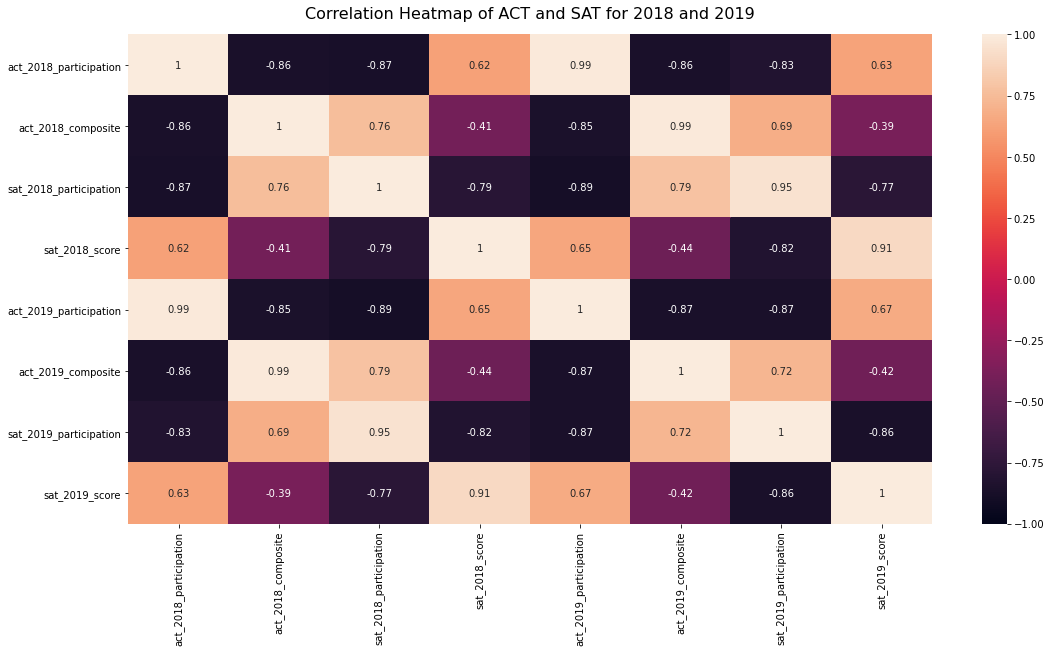

In [72]:
# Code
plot.figure( figsize = (18, 9) )
dataplot = sb.heatmap( final_data.corr(), vmin = -1, vmax = 1, annot = True )
dataplot.set_title('Correlation Heatmap of ACT and SAT for 2018 and 2019', fontdict = {'fontsize':16}, pad = 16)
plot.show()

**Interpretation** : It is observed from the heatmap that most of the features shows a strong relationship with all other features.

### Histogram

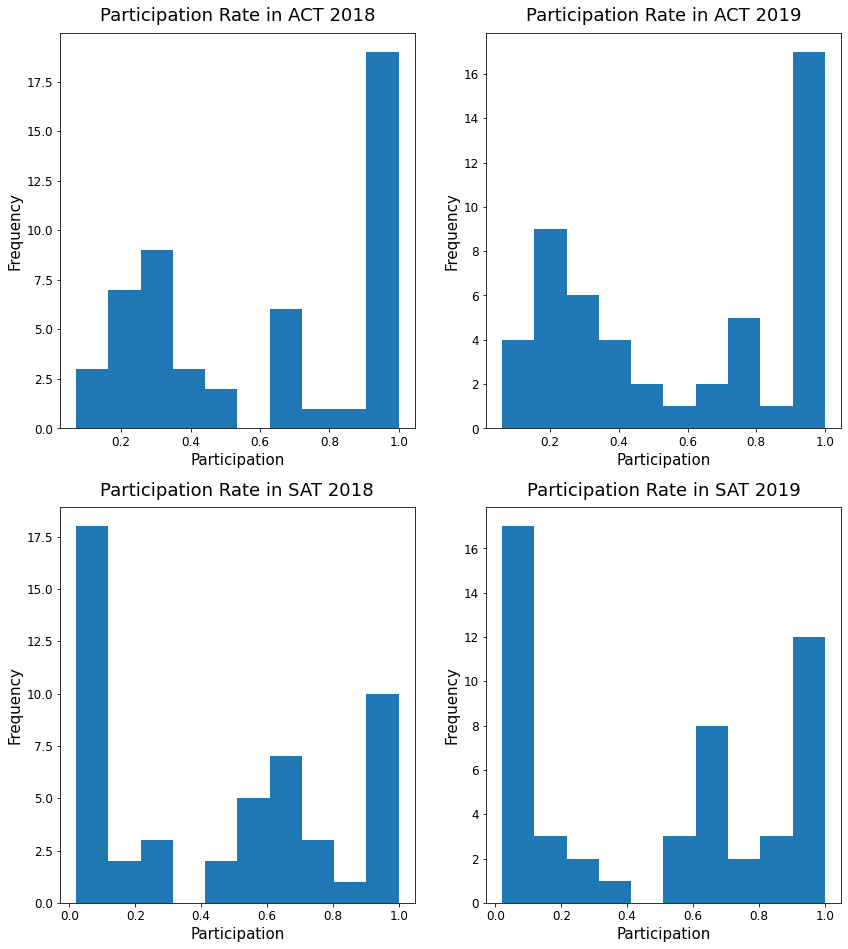

In [73]:
plot.figure(figsize = (14, 16))

plot.subplot(2, 2, 1)
final_data['act_2018_participation'].hist(bins = 10, grid = False, xlabelsize = 12, ylabelsize = 12)
plot.title('Participation Rate in ACT 2018', fontsize = 18, pad = 12)
plot.xlabel("Participation", fontsize = 15)
plot.ylabel("Frequency",fontsize = 15)

plot.subplot(2, 2, 2)
final_data['act_2019_participation'].hist(bins = 10, grid = False, xlabelsize = 12, ylabelsize = 12)
plot.title('Participation Rate in ACT 2019', fontsize = 18, pad = 12)
plot.xlabel("Participation", fontsize = 15)
plot.ylabel("Frequency",fontsize = 15)

plot.subplot(2, 2, 3)
final_data['sat_2018_participation'].hist(bins = 10, grid = False, xlabelsize = 12, ylabelsize = 12)
plot.title('Participation Rate in SAT 2018', fontsize = 18, pad = 12)
plot.xlabel("Participation", fontsize = 15)
plot.ylabel("Frequency", fontsize = 15)

plot.subplot(2, 2, 4)
final_data['sat_2019_participation'].hist(bins = 10, grid = False, xlabelsize = 12, ylabelsize = 12)
plot.title('Participation Rate in SAT 2019', fontsize = 18, pad = 12)
plot.xlabel("Participation", fontsize = 15)
plot.ylabel("Frequency", fontsize = 15)
plot.show()

**Interpretation** : It is observed from the histogram that most of the states shows higher rate of participation in ACT and less participation rate in SAT. This pattern is observed in 2018 as well as in 2019.

### BoxPlot

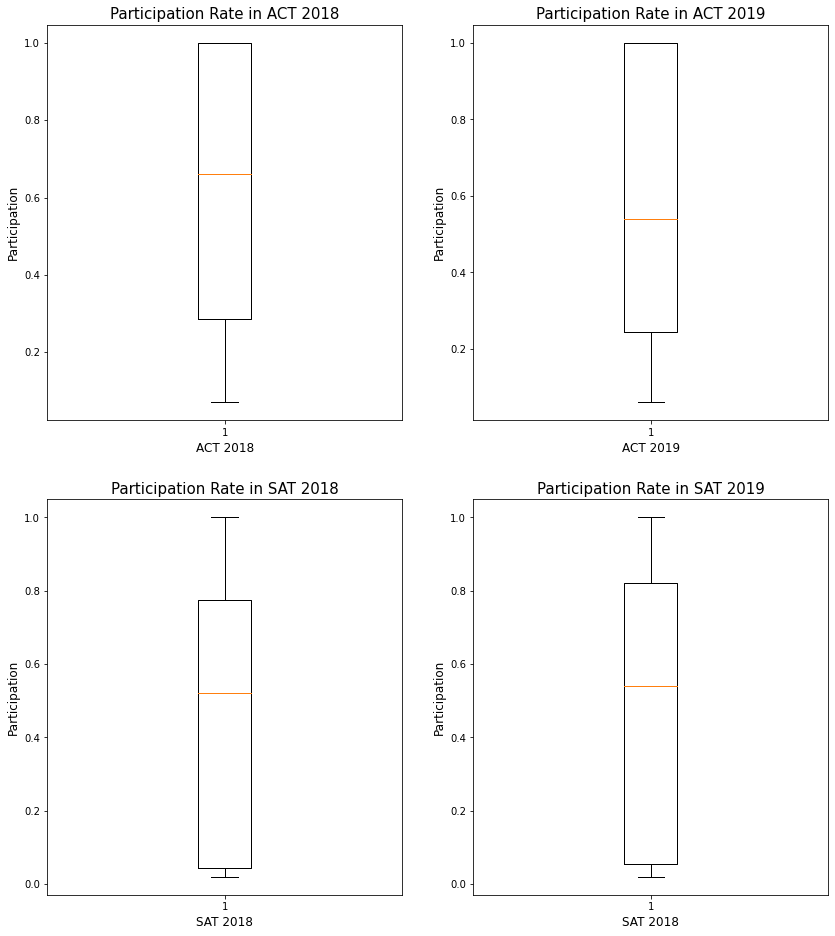

In [74]:
plot.figure( figsize = (14, 16) )

plot.subplot(2, 2, 1)
plot.title('Participation Rate in ACT 2018', fontsize = 15)
plot.xlabel("ACT 2018", fontsize = 12)
plot.ylabel("Participation", fontsize = 12)
plot.boxplot(final_data['act_2018_participation'])

plot.subplot(2, 2, 2)
plot.title('Participation Rate in ACT 2019', fontsize = 15)
plot.xlabel("ACT 2019", fontsize = 12)
plot.ylabel("Participation", fontsize = 12)
plot.boxplot(final_data['act_2019_participation'])

plot.subplot(2, 2, 3)
plot.title('Participation Rate in SAT 2018', fontsize = 15)
plot.xlabel("SAT 2018", fontsize = 12)
plot.ylabel("Participation", fontsize = 12)
plot.boxplot(final_data['sat_2018_participation'])

plot.subplot(2, 2, 4)
plot.title('Participation Rate in SAT 2019', fontsize = 15)
plot.xlabel("SAT 2018", fontsize = 12)
plot.ylabel("Participation", fontsize = 12)
plot.boxplot(final_data['sat_2019_participation'])

plot.show()

**Interpretation** : From the above boxplots we can derive the respective median, 25th percentile and 75th percentile for SAT and ACT participation rate of 2018 and 2019.

### Scattered Plot

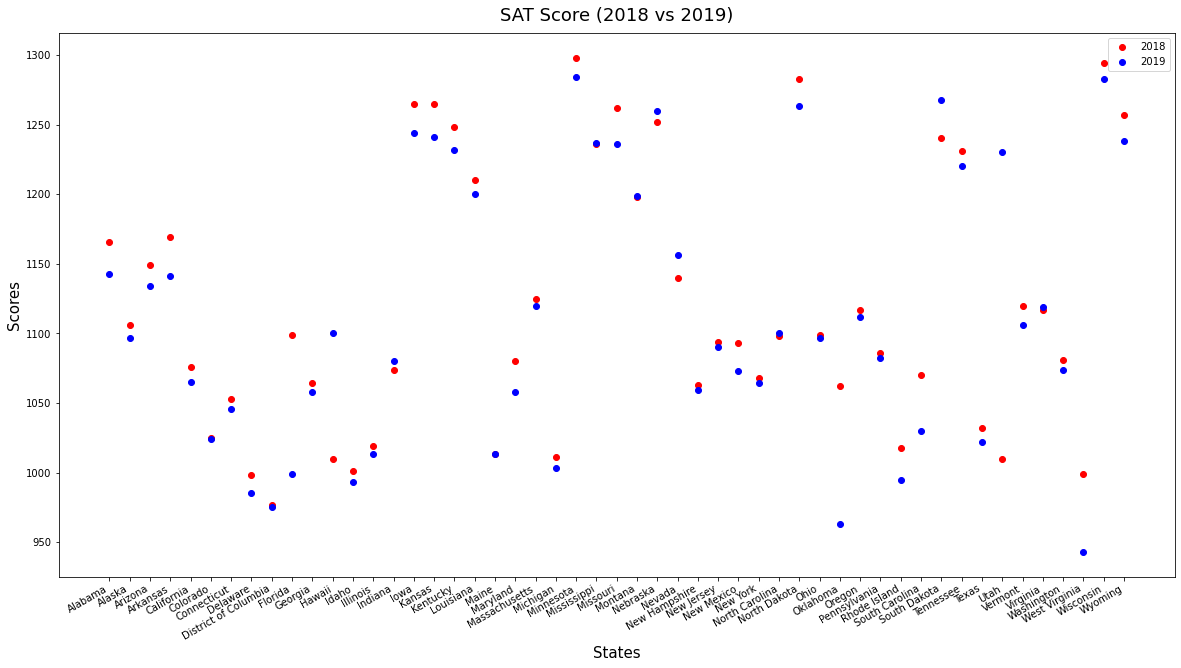

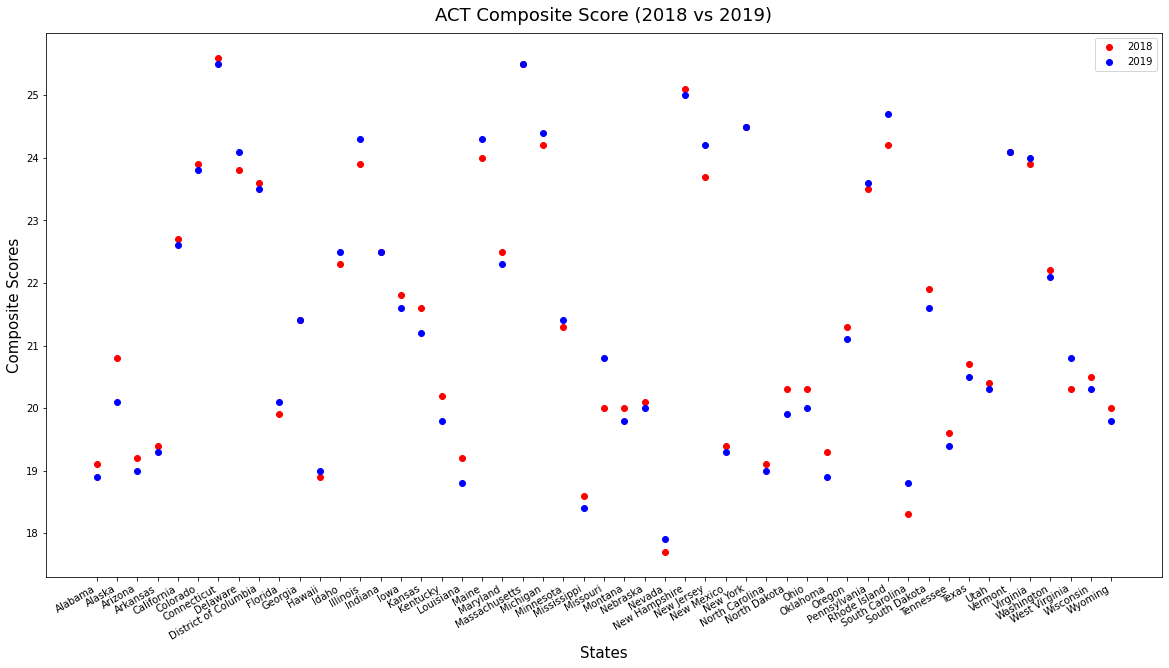

In [75]:
plot.figure( figsize = (20, 10) )

y1 = final_data['sat_2018_score']
y2 = final_data['sat_2019_score']
x = final_data['state']

plot.scatter(x, y1, label  ='2018', color = 'r')
plot.scatter(x, y2, label='2019', color = 'b')
plot.xlabel("States", fontsize = 15)
plot.ylabel("Scores",fontsize = 15)
plot.xticks(rotation = 30, horizontalalignment = 'right')
plot.title('SAT Score (2018 vs 2019)', fontsize = 18, pad = 12)
plot.legend()
plot.show()


plot.figure( figsize = (20, 10) )
y1 = final_data['act_2018_composite']
y2 = final_data['act_2019_composite']
x = final_data['state']

plot.scatter(x, y1, label = '2018', color = 'r')
plot.scatter(x, y2, label = '2019', color = 'b')
plot.xlabel("States", fontsize = 15)
plot.ylabel("Composite Scores", fontsize = 15)
plot.xticks( rotation = 30, horizontalalignment = 'right')
plot.title('ACT Composite Score (2018 vs 2019)', fontsize = 18, pad = 12)
plot.legend()
plot.show()

**Interpretation** : It is observed from the scatter plot that most of the states shows almost similar results in ACT and SAT each year. only few states shows significant difference in results.

### Additional Plots

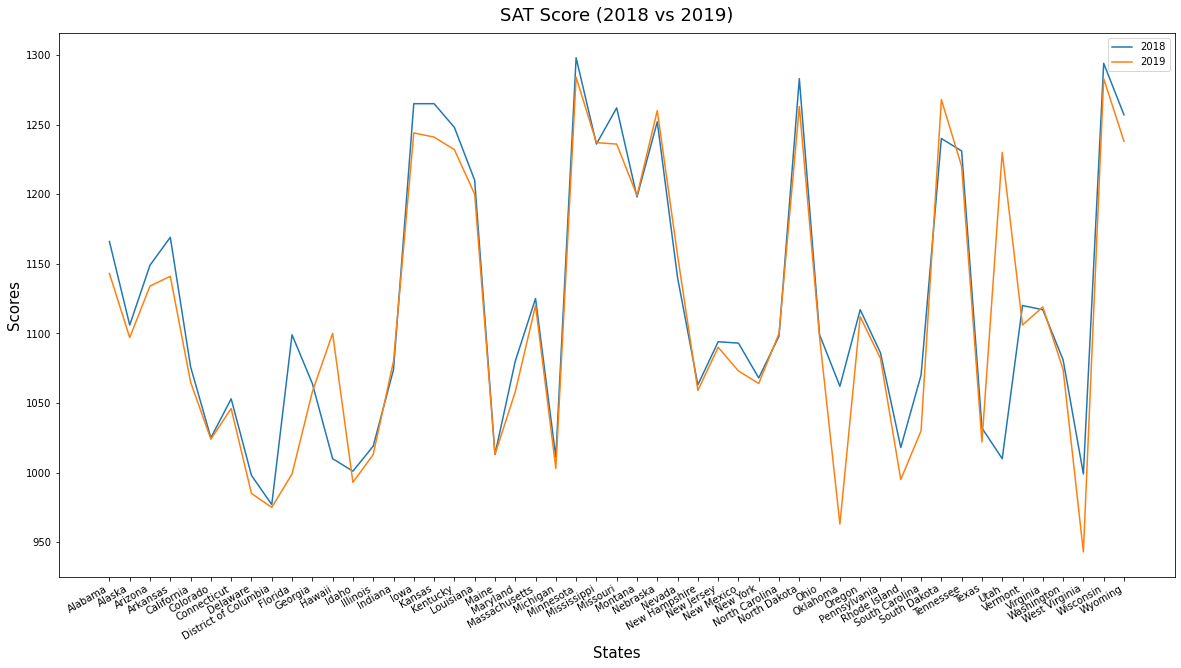

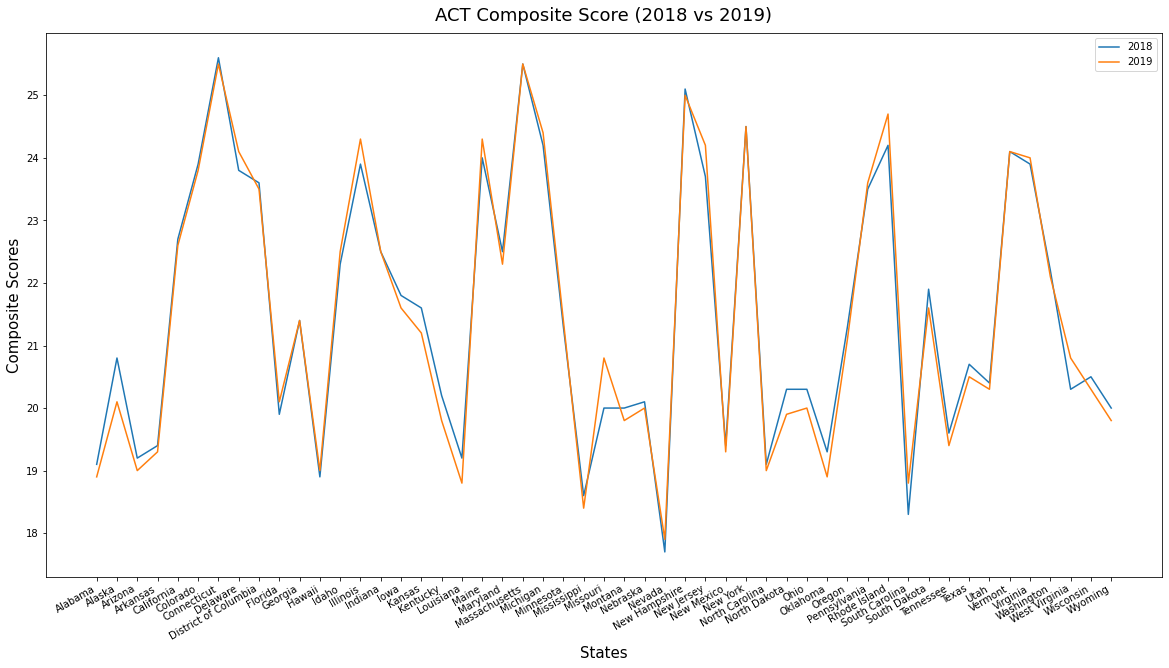

In [76]:
plot.figure( figsize = (20, 10) )
y1 = final_data['sat_2018_score']
y2 = final_data['sat_2019_score']
x = final_data['state']

plot.plot(x, y1, label = '2018')
plot.plot(x, y2, label = '2019')
plot.xlabel("States", fontsize = 15)
plot.ylabel("Scores", fontsize = 15)
plot.xticks( rotation = 30, horizontalalignment = 'right')
plot.title('SAT Score (2018 vs 2019)', fontsize = 18, pad = 12)
plot.legend()
plot.show()


plot.figure( figsize = (20, 10) )
y1 = final_data['act_2018_composite']
y2 = final_data['act_2019_composite']
x = final_data['state']

plot.plot(x, y1, label = '2018')
plot.plot(x, y2, label = '2019')
plot.xlabel("States", fontsize = 15)
plot.ylabel("Composite Scores",fontsize = 15)
plot.xticks(rotation = 30, horizontalalignment = 'right')
plot.title('ACT Composite Score (2018 vs 2019)', fontsize = 18, pad = 12)
plot.legend()
plot.show()

**Interpretation** : It is observed from the curves that the results across most of the states remains almost same for both the years in ACT and SAT. This plot supports the interpretation done for the scattered plot. 

## Conclusions and Recommendations

From the visualization of the data, we can observe the trend in participation rate and scores across the states of USA remains almost the same for the years 2018 and 2019. The standard deviations found previously supports the above. This gives better understanding of the recent trends in ACT and SAT in USA. The final dataset can be used to build a predictive machine learning models.